In [1]:
import pandas as pd

In [2]:
passwd = ''

In [3]:
import io
import pandas as pd
import msoffcrypto

decrypted_workbook = io.BytesIO()
with open('../input/[ENCRYPTED] Stocks.xlsx', 'rb') as file:
    office_file = msoffcrypto.OfficeFile(file)
    office_file.load_key(password=passwd)
    office_file.decrypt(decrypted_workbook)

stocks_data = pd.read_excel(decrypted_workbook, sheet_name=0)

In [4]:
stocks_data.head()

,Symbol,DATE,CLOSE
0,RELIANCE,2020-03-09,1114.15
1,SBIN,2020-03-09,253.45
2,ICICIBANK,2020-03-09,457.75
3,HDFCBANK,2020-03-09,1107.30
4,BPCL,2020-03-09,423.85


sectors = {
    'banks' : ['SBIN','ICICIBANK', 'YESBANK','HDFCBANK', 'INDUSINDBK', 'AXISBANK', 'KOTAKBANK'],
    'finance' : ['HDFC', 'BAJFINANCE', 'BAJAJFINSV'],
    'other' : ['ITC', 'TITAN', 'GRASIM'],
    'media_entmt' : ['ZEEL'],
    'mining' : ['COALINDIA', 'VEDL'],
    'power' : ['POWERGRID', 'NTPC'],
    'telecommunications' : ['BHARTIARTL', 'INFRATEL'],
    'auto' : ['BAJAJ-AUTO', 'TATAMOTORS', 'MARUTI', 'EICHERMOT', 'M&M', 'HEROMOTOCO'],
    'it' : ['TCS', 'INFY', 'TECHM', 'HCLTECH','WIPRO'],
    'infra' : ['LT', 'ADANIPORTS'],
    'pharmaceuticals' : ['CIPLA', 'SUNPHARMA', 'DRREDDY'],
    'paint' : ['ASIANPAINT'],
    'personal_care' : ['HINDUNILVR'],
    'refineries' : ['RELIANCE', 'IOC', 'BPCL'],
    'oil' : ['ONGC', 'GAIL'],
    'iron_steel' : ['TATASTEEL', 'JSWSTEEL', 'HINDALCO'],
    'cement' : ['ULTRACEMCO'],
    'chemical' : ['UPL'],
    'food' : ['NESTLEIND', 'BRITANNIA']
}

In [5]:
sectors = {
    'banks' : ['SBIN','ICICIBANK', 'YESBANK','HDFCBANK', 'INDUSINDBK', 'AXISBANK', 'KOTAKBANK'],
    'finance' : ['HDFC', 'BAJFINANCE', 'BAJAJFINSV'],
    'other' : ['ITC', 'TITAN', 'GRASIM'],
    'media_entmt' : ['ZEEL'],
    'mining' : ['COALINDIA', 'VEDL'],
    'power' : ['POWERGRID', 'NTPC'],
    'telecommunications' : ['BHARTIARTL', 'INFRATEL'],
    'auto' : ['BAJAJ-AUTO', 'TATAMOTORS', 'MARUTI', 'EICHERMOT', 'M&M', 'HEROMOTOCO'],
    'it' : ['TCS', 'INFY', 'TECHM', 'HCLTECH','WIPRO'],
    'infra' : ['LT', 'ADANIPORTS'],
    'pharmaceuticals' : ['CIPLA', 'SUNPHARMA', 'DRREDDY'],
    'personal_care' : ['HINDUNILVR'],
    'oil_refineries' : ['RELIANCE', 'IOC', 'BPCL', 'ONGC', 'GAIL'],
    'iron_steel' : ['TATASTEEL', 'JSWSTEEL', 'HINDALCO'],
    'chemical' : ['ULTRACEMCO', 'UPL', 'ASIANPAINT'],
    'food' : ['NESTLEIND', 'BRITANNIA']
}

In [6]:
sectors_companywise = {}
for i in sectors:
    for j in sectors[i]:
        sectors_companywise[j] = i

In [7]:
stocks_data['Sector'] = stocks_data['Symbol'].map(sectors_companywise)

In [8]:
stocks_data.head()

,Symbol,DATE,CLOSE,Sector
0,RELIANCE,2020-03-09,1114.15,oil_refineries
1,SBIN,2020-03-09,253.45,banks
2,ICICIBANK,2020-03-09,457.75,banks
3,HDFCBANK,2020-03-09,1107.30,banks
4,BPCL,2020-03-09,423.85,oil_refineries


In [9]:
import matplotlib.pyplot as plt

In [10]:
grouped = stocks_data.groupby('Sector')
grouped.first()

,Symbol,DATE,CLOSE
Sector,,,
auto,TATAMOTORS,2020-03-09,105.70
banks,SBIN,2020-03-09,253.45
chemical,ASIANPAINT,2020-03-09,1867.15
finance,BAJFINANCE,2020-03-09,8207.10
food,NESTLEIND,2020-03-09,16031.35
infra,LT,2020-03-09,1101.95
iron_steel,TATASTEEL,2020-03-09,322.30
it,TCS,2020-03-09,1972.35
media_entmt,ZEEL,2020-03-09,194.45


In [11]:
grouped.get_group('auto')

,Symbol,DATE,CLOSE,Sector
12,TATAMOTORS,2020-03-09,105.70,auto
17,MARUTI,2020-03-09,6201.10,auto
28,EICHERMOT,2020-03-09,17885.80,auto
36,M&M,2020-03-09,463.20,auto
40,BAJAJ-AUTO,2020-03-09,2573.35,auto
...,...,...,...,...
8117,MARUTI,2019-07-12,5971.45,auto
8128,EICHERMOT,2019-07-12,18955.30,auto
8136,M&M,2019-07-12,631.90,auto
8140,BAJAJ-AUTO,2019-07-12,2722.55,auto


In [12]:
t = stocks_data.groupby('Symbol')
t.get_group('ADANIPORTS')

,Symbol,DATE,CLOSE,Sector
49,ADANIPORTS,2020-03-09,321.90,infra
99,ADANIPORTS,2020-03-06,341.40,infra
149,ADANIPORTS,2020-03-05,349.15,infra
199,ADANIPORTS,2020-03-04,345.95,infra
249,ADANIPORTS,2020-03-03,347.30,infra
...,...,...,...,...
7949,ADANIPORTS,2019-07-18,412.40,infra
7999,ADANIPORTS,2019-07-17,417.05,infra
8049,ADANIPORTS,2019-07-16,417.75,infra
8099,ADANIPORTS,2019-07-15,409.10,infra


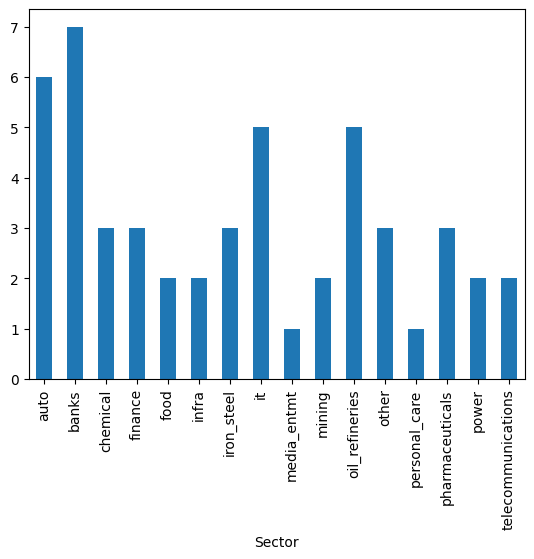

In [13]:
(grouped.size()/t.size()[0]).plot(kind='bar')
plt.show()

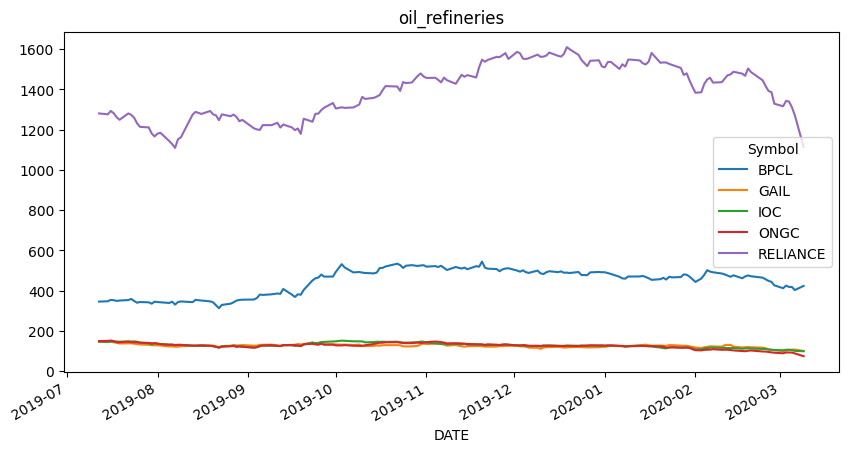

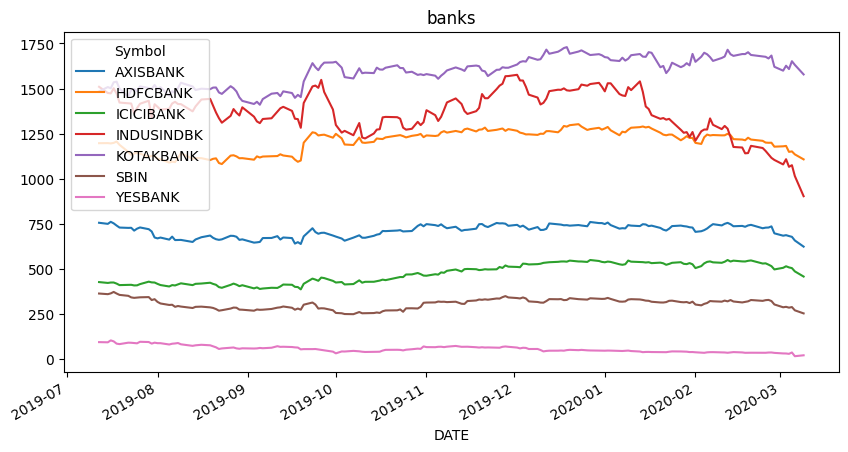

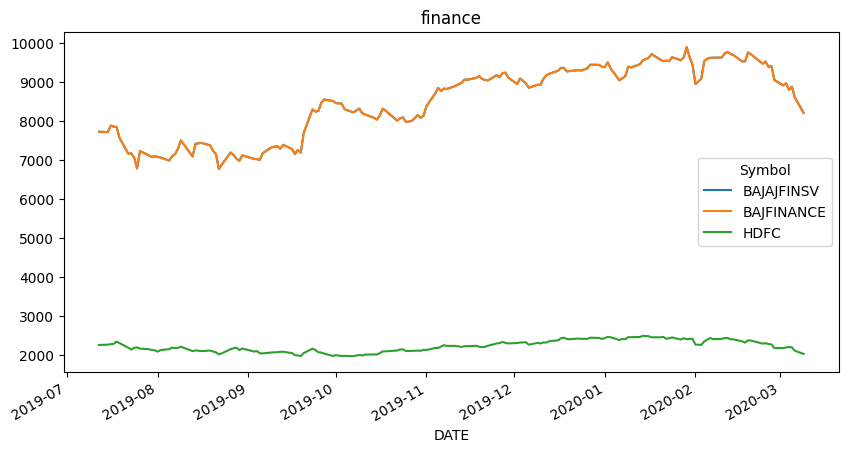

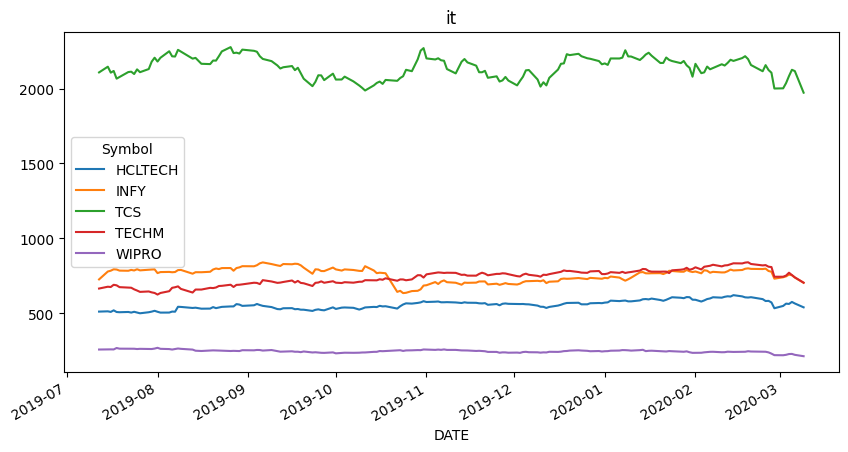

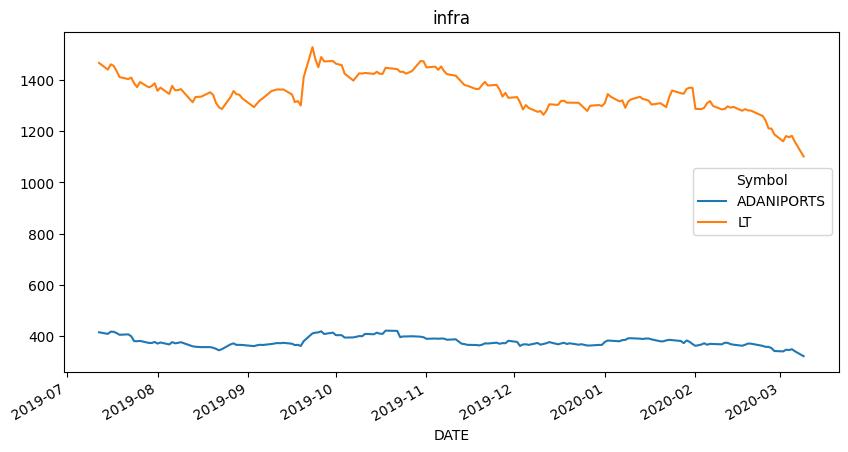

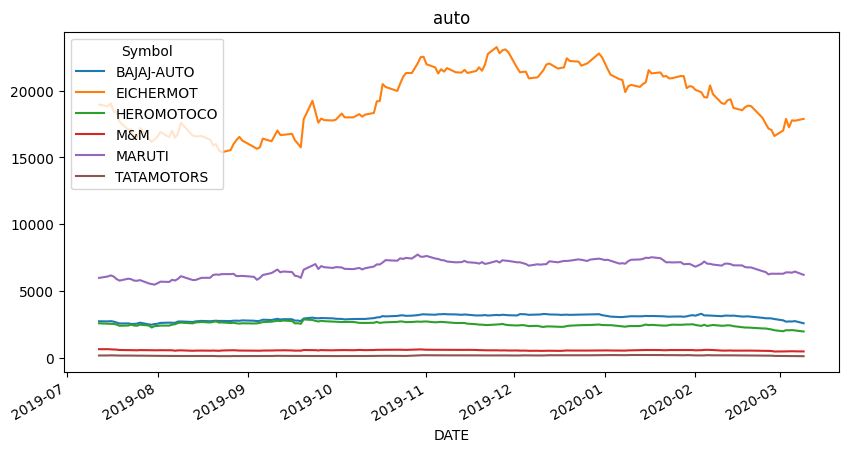

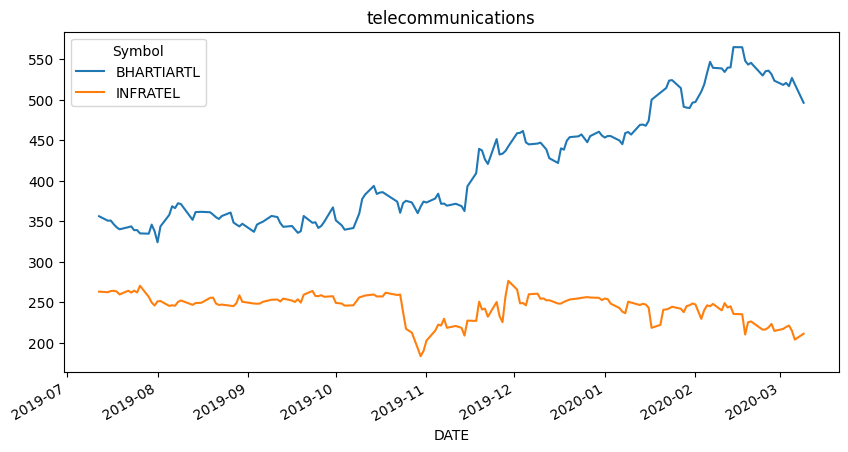

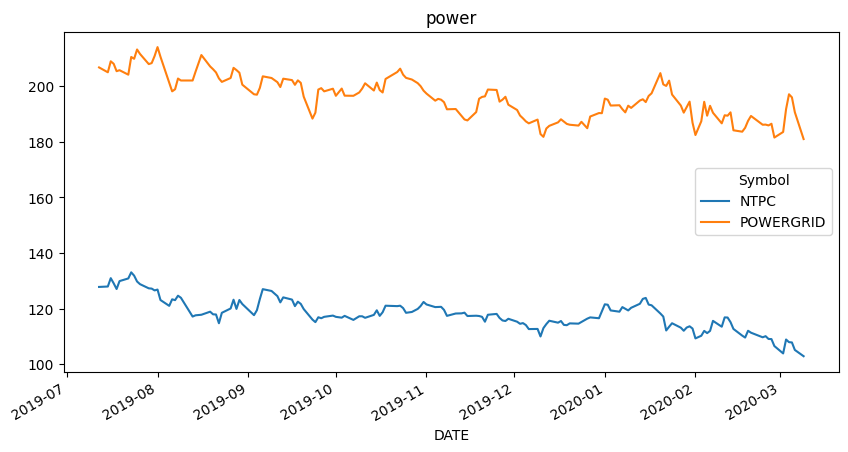

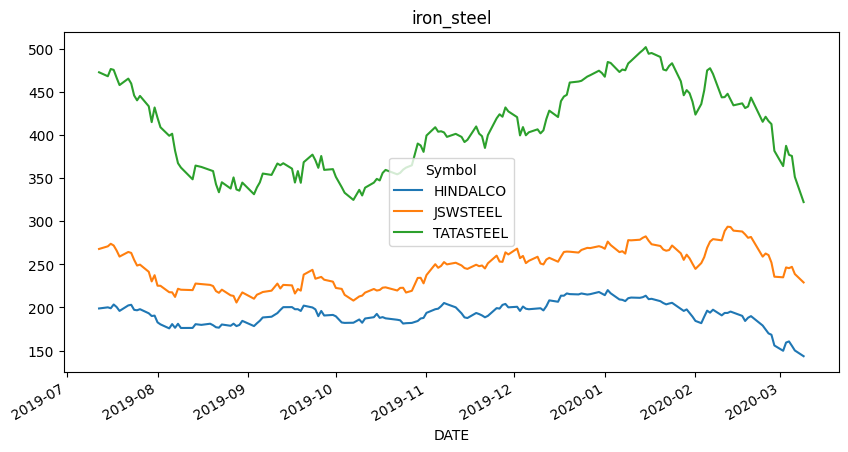

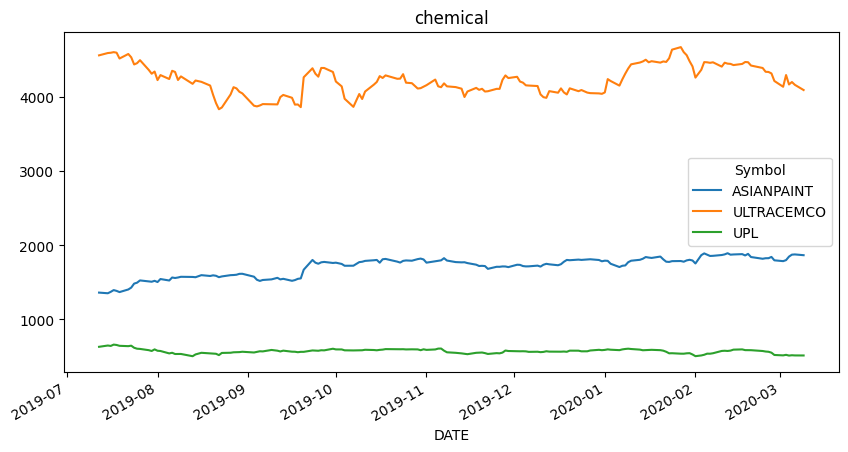

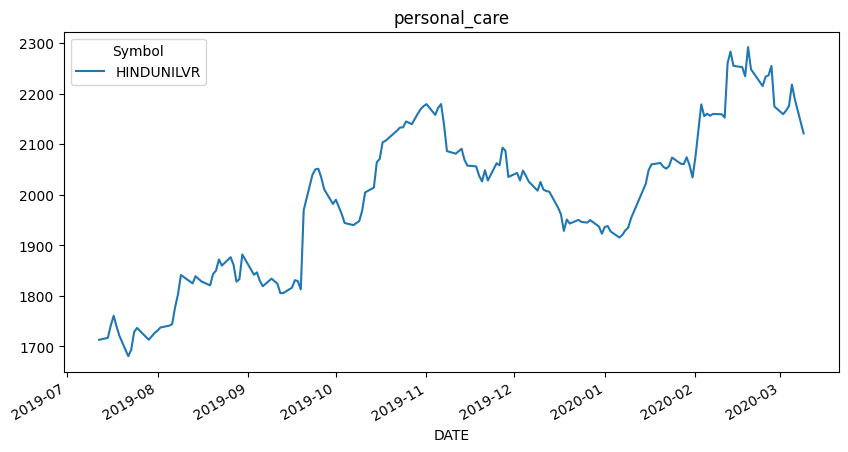

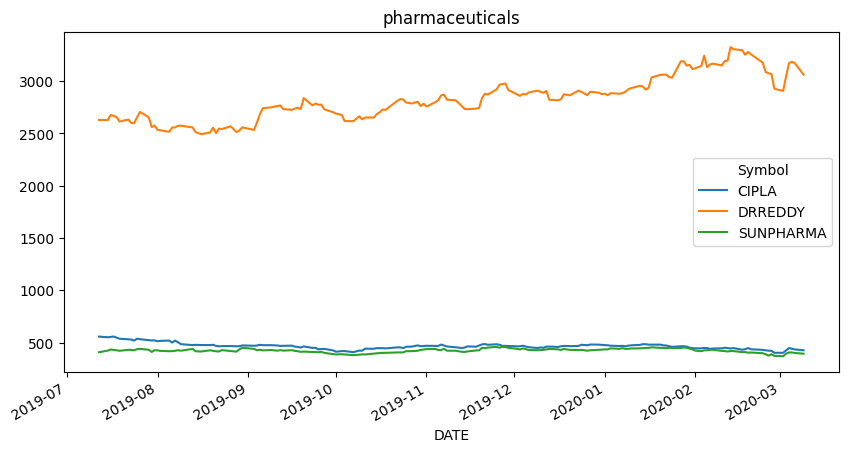

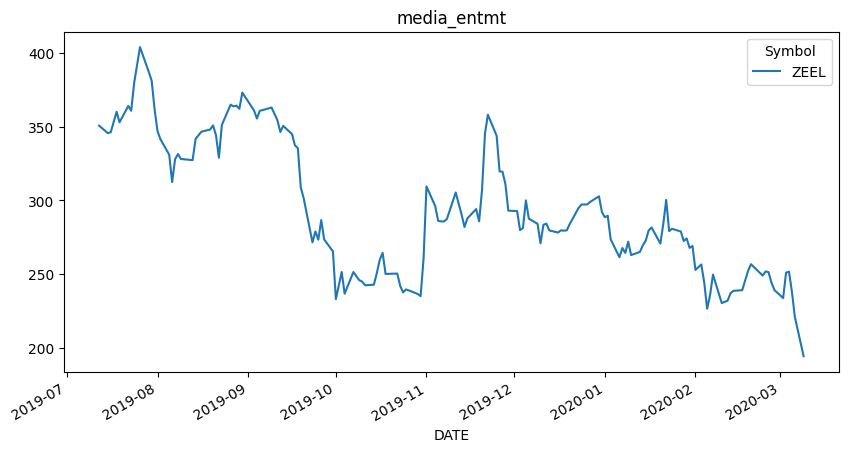

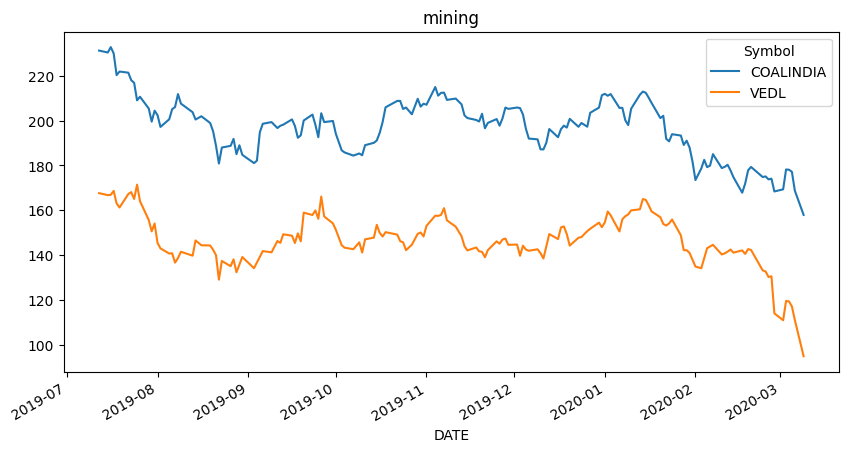

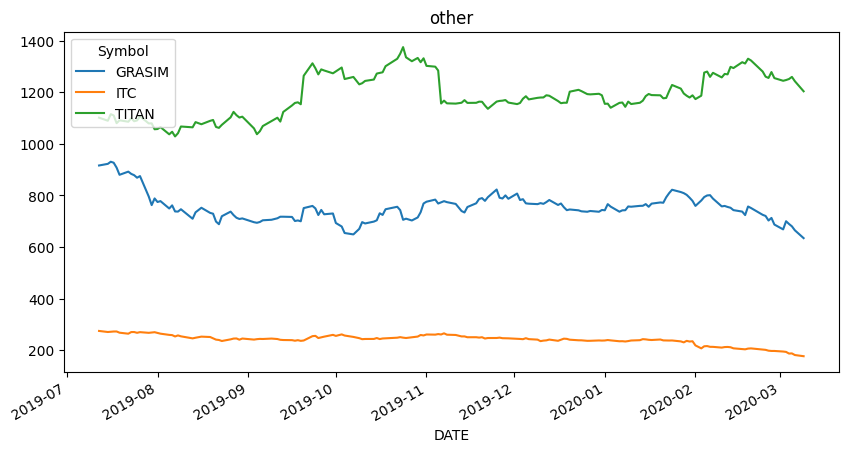

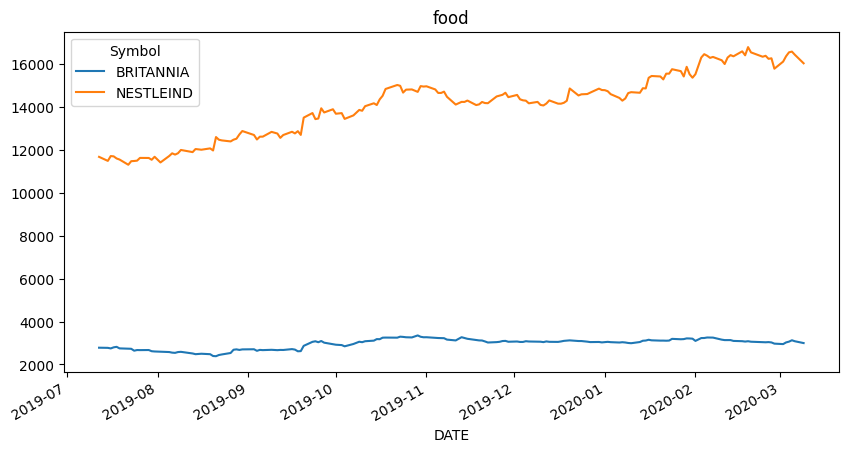

In [14]:
for i in stocks_data['Sector'].unique():
    t = stocks_data[stocks_data['Sector']==i]
    t.pivot(index="DATE", columns="Symbol", values="CLOSE").plot(title=i, figsize=(10,5))
plt.show()

In [15]:
# stocks_data.to_csv('../output/data.csv', index=False)

In [17]:
stocks_data.head()

,Symbol,DATE,CLOSE,Sector
0,RELIANCE,2020-03-09,1114.15,oil_refineries
1,SBIN,2020-03-09,253.45,banks
2,ICICIBANK,2020-03-09,457.75,banks
3,HDFCBANK,2020-03-09,1107.30,banks
4,BPCL,2020-03-09,423.85,oil_refineries


In [19]:
df = stocks_data[['Symbol','DATE', 'CLOSE']]
df

,Symbol,DATE,CLOSE
0,RELIANCE,2020-03-09,1114.15
1,SBIN,2020-03-09,253.45
2,ICICIBANK,2020-03-09,457.75
3,HDFCBANK,2020-03-09,1107.30
4,BPCL,2020-03-09,423.85
...,...,...,...
8145,HEROMOTOCO,2019-07-12,2569.80
8146,HINDALCO,2019-07-12,198.85
8147,INFRATEL,2019-07-12,262.95
8148,CIPLA,2019-07-12,556.80


In [22]:
a = df.pivot(index="DATE", columns="Symbol", values="CLOSE")

In [23]:
st

Symbol,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,VEDL,WIPRO,YESBANK,ZEEL
DATE,,,,,,,,,,,,,,,,,,,,,
2019-07-12,415.30,1361.95,755.80,2722.55,7725.70,7725.70,356.10,345.75,2780.60,556.80,...,472.90,2107.60,665.80,1101.20,4565.85,630.05,167.65,258.95,94.20,350.70
2019-07-15,409.10,1353.15,749.75,2714.00,7714.45,7714.45,350.60,347.40,2773.60,550.55,...,468.30,2145.70,677.90,1089.40,4597.00,647.40,166.75,259.90,93.20,345.60
2019-07-16,417.75,1372.30,761.05,2732.45,7881.70,7881.70,350.75,354.45,2747.15,553.55,...,476.70,2106.00,675.95,1114.75,4600.90,641.90,166.90,260.00,103.85,346.25
2019-07-17,417.05,1395.90,752.60,2696.90,7854.55,7854.55,346.25,352.80,2797.80,557.55,...,475.70,2117.25,690.80,1109.90,4608.95,659.75,168.65,259.60,98.40,353.25
2019-07-18,412.40,1384.95,740.40,2630.80,7847.65,7847.65,342.50,349.25,2820.85,547.00,...,466.60,2065.95,687.20,1080.00,4601.75,654.75,163.05,269.10,85.80,360.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-03,347.30,1800.55,687.15,2692.25,8963.65,8963.65,520.80,425.00,3026.50,425.30,...,387.55,2036.20,752.30,1247.00,4299.90,521.55,119.55,223.70,31.20,251.10
2020-03-04,345.95,1847.95,682.20,2711.50,8799.70,8799.70,516.75,418.70,3063.05,447.65,...,377.15,2083.20,771.30,1250.95,4172.80,511.60,119.35,228.85,29.30,251.75
2020-03-05,349.15,1874.45,677.90,2703.65,8879.90,8879.90,526.90,418.40,3127.15,440.60,...,375.75,2125.05,756.10,1259.15,4205.55,516.05,117.10,229.70,36.80,238.15


In [28]:
max(stocks_data.DATE)

Timestamp('2020-03-09 00:00:00')